In [1]:
#importing libraries
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D ,Dropout, Flatten ,MaxPooling2D

In [2]:
datagentrain=ImageDataGenerator(rescale=1/255)
datagentest=ImageDataGenerator(rescale=1/255)

In [3]:
!git clone https://github.com/dakshtrehan/Covid-19-Detection/

Cloning into 'Covid-19-Detection'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 353 (delta 25), reused 11 (delta 3), pack-reused 306
Receiving objects: 100% (353/353), 193.19 MiB | 28.32 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [32]:
#Reading data into train and test
train=datagentrain.flow_from_directory('/content/Covid-19-Detection/CovidDataset/Train',batch_size=20,target_size=(256,256))
test=datagentest.flow_from_directory('/content/Covid-19-Detection/CovidDataset/Val',batch_size=20,target_size=(256,256))

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


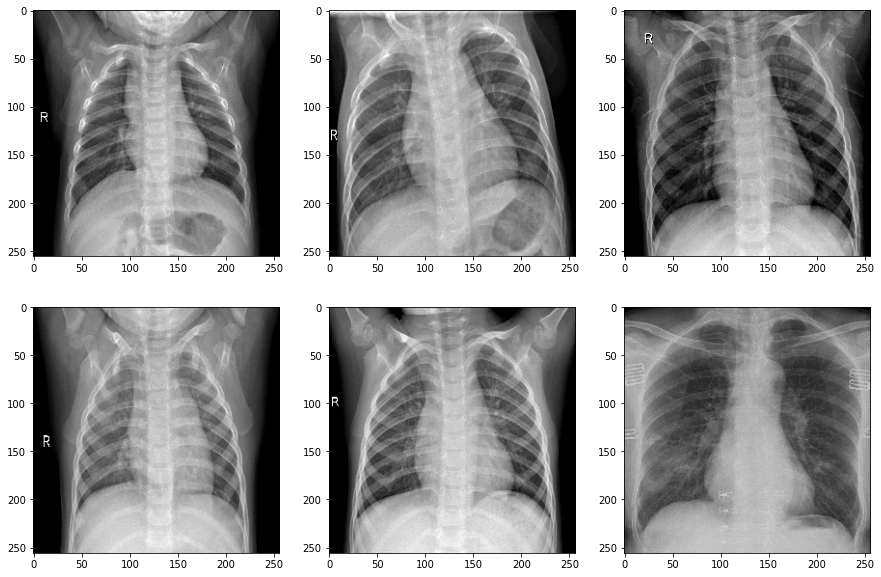

In [33]:
plt.figure(figsize=(15,10))
for(i,j) in [(2,1),(4,2),(8,3),(12,4),(15,5),(18,6)]:
  plt.subplot(2,3,j)
  plt.imshow(train[0][0][i])
plt.show()

In [34]:
for i in [2,4,8,12,15,18]:
  print(train[0][1][i])

[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]


In [35]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 65536)           

In [40]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [41]:
history=model.fit(train,batch_size=20,epochs=10)

Epoch 1/10
12/12 [==============================] - 5s 405ms/step - loss: 0.7449 - accuracy: 0.5562
Epoch 2/10
12/12 [==============================] - 5s 418ms/step - loss: 0.2966 - accuracy: 0.8985
Epoch 3/10
12/12 [==============================] - 5s 449ms/step - loss: 0.0950 - accuracy: 0.9703
Epoch 4/10
12/12 [==============================] - 5s 410ms/step - loss: 0.0469 - accuracy: 0.9819
Epoch 5/10
12/12 [==============================] - 5s 452ms/step - loss: 0.0445 - accuracy: 0.9857
Epoch 6/10
12/12 [==============================] - 5s 418ms/step - loss: 0.0334 - accuracy: 0.9980
Epoch 7/10
12/12 [==============================] - 5s 418ms/step - loss: 0.0165 - accuracy: 0.9908
Epoch 8/10
12/12 [==============================] - 5s 407ms/step - loss: 0.0241 - accuracy: 0.9862
Epoch 9/10
12/12 [==============================] - 5s 405ms/step - loss: 0.0140 - accuracy: 0.9993
Epoch 10/10
12/12 [==============================] - 5s 391ms/step - loss: 6.2200e-04 - accuracy: 1.

In [42]:
model.evaluate(test)

3/3 [==============================] - 2s 579ms/step - loss: 0.3789 - accuracy: 0.9667


[0.3789256811141968, 0.9666666388511658]